In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
import csv
import glob
import os
from typing import List, Tuple
from tqdm import tqdm
from types import SimpleNamespace
from utils import get_current_dir

args = SimpleNamespace(
    inputpath=get_current_dir().parent / "data" / "results",
)

dfs = []
for path in tqdm(glob.glob(str(args.inputpath / "*.csv"))):
    df = pd.read_csv(path) # all have same cols
    dfs.append(df)
df = pd.concat(dfs)

embeddings_list = [np.array(eval(emb)[0]) for emb in tqdm(df['embeddings'])]
embeddings_array = np.vstack(embeddings_list)

df

 86%|████████▌ | 18/21 [00:32<00:04,  1.34s/it]

In [2]:
print(df.columns)
print(df.shape)
print(df.dtypes)
print(df.describe())
print(df.isna().sum())
print(df.head())

Index(['conversation_language', 'author_name', 'partner_name',
       'author_monthly_sentiments', 'partner_monthly_sentiments',
       'author_monthly_toxicity', 'partner_monthly_toxicity', 'author_gender',
       'partner_gender', 'topic_diversity', 'total_messages',
       'author_message_ratio', 'partner_message_ratio',
       'author_avg_word_count', 'partner_avg_word_count', 'author_media_count',
       'partner_media_count', 'author_emoji_count', 'partner_emoji_count',
       'author_url_count', 'partner_url_count', 'author_vocabulary_size',
       'partner_vocabulary_size', 'total_conversations', 'total_duration_days',
       'author_message_freq_s', 'partner_message_freq_s',
       'author_response_time_s', 'partner_response_time_s',
       'author_avg_active_time', 'partner_avg_active',
       'author_conversation_initiations', 'partner_conversation_initiations',
       'embeddings'],
      dtype='object')
(20, 34)
conversation_language                object
author_name      

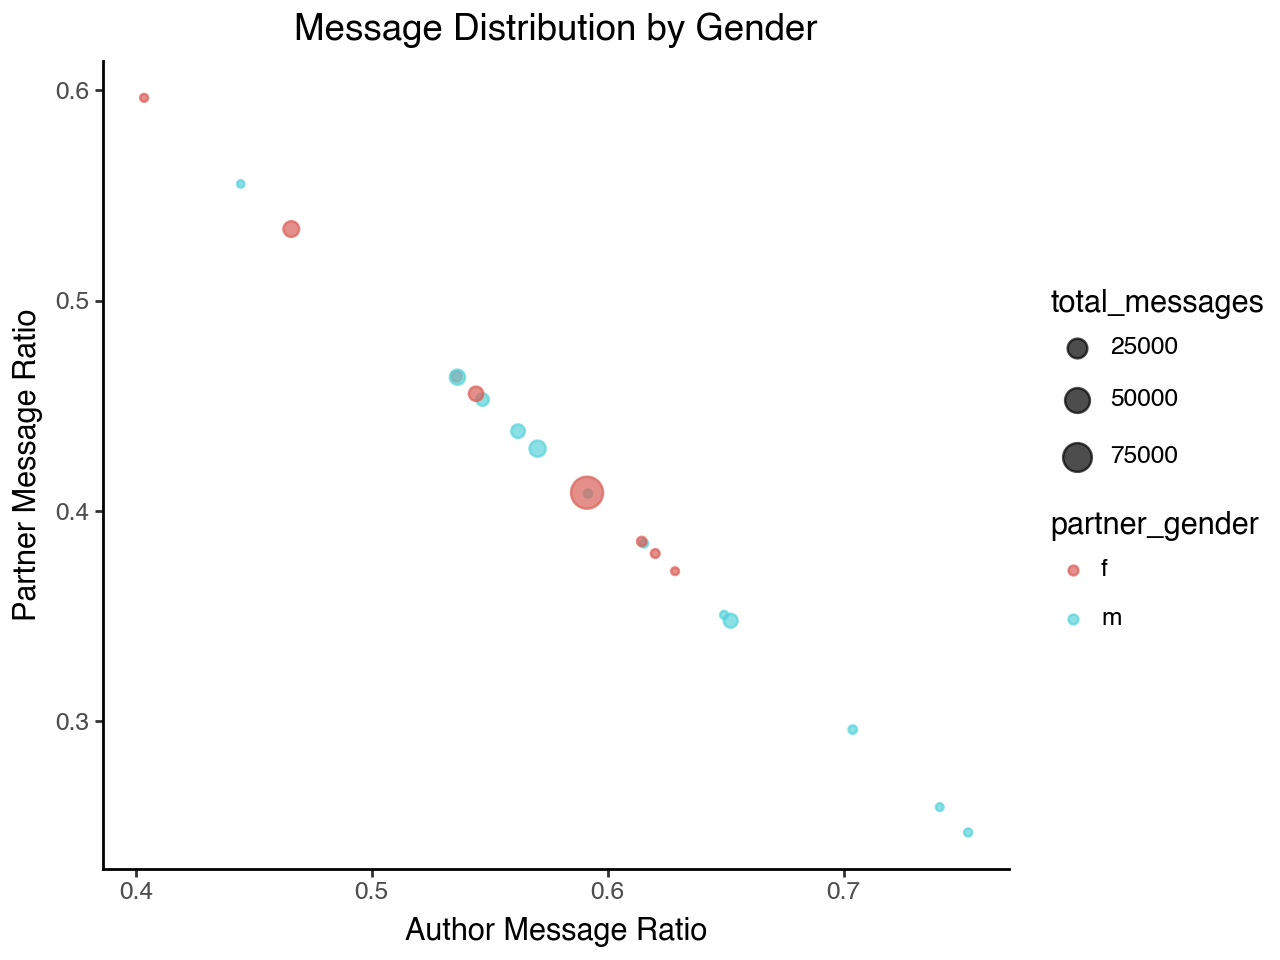

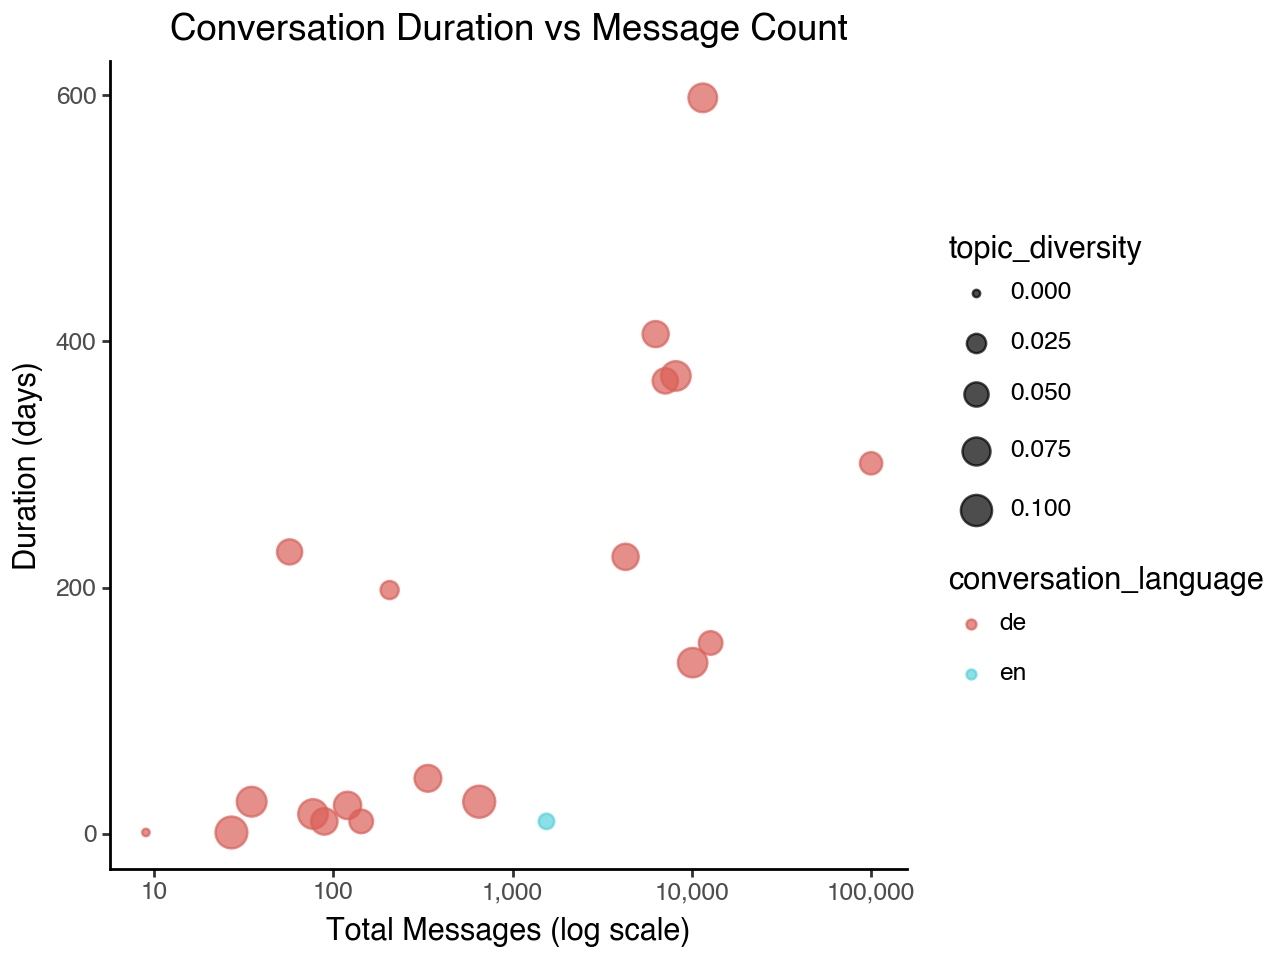

In [3]:
from plotnine import *
import pandas as pd
import numpy as np

# message distribution by gender
p1 = (ggplot(df, aes(x='author_message_ratio', y='partner_message_ratio'))
    + geom_point(aes(size='total_messages', color='partner_gender'), alpha=0.7)
    + labs(title='Message Distribution by Gender',
           x='Author Message Ratio',
           y='Partner Message Ratio')
    + theme_classic())
p1.show()

# communication patterns
p2 = (ggplot(df, aes(x='total_messages', y='total_duration_days'))
    + geom_point(aes(size='topic_diversity', color='conversation_language'), alpha=0.7)
    + scale_x_log10(labels=lambda l: [f'{int(v):,}' for v in l])
    + labs(title='Conversation Duration vs Message Count',
           x='Total Messages (log scale)',
           y='Duration (days)')
    + theme_classic())
p2.show()

In [ ]:
from plotnine import *
import pandas as pd
import numpy as np

# 1. Message Distribution Plot
p1 = (ggplot(df, aes(x='author_message_ratio', y='partner_message_ratio')) +
      geom_point(aes(size='total_messages'), alpha=0.6) +
      geom_smooth(method='lm', color='red') +
      labs(title='Message Distribution between Author and Partner',
           x='Author Message Ratio',
           y='Partner Message Ratio'))

# 2. Word Count Comparison
p2 = (ggplot(df) +
      geom_boxplot(aes(x='1', y='author_avg_word_count'), fill='blue', alpha=0.5) +
      geom_boxplot(aes(x='2', y='partner_avg_word_count'), fill='green', alpha=0.5) +
      labs(title='Average Word Count Comparison',
           x='Participant',
           y='Average Word Count') +
      scale_x_discrete(labels=['Author', 'Partner']))

# 3. Response Time Distribution
p3 = (ggplot(df, aes(x='author_response_time_s', y='partner_response_time_s')) +
      geom_point(aes(size='total_conversations'), alpha=0.6) +
      labs(title='Response Time Comparison',
           x='Author Response Time (s)',
           y='Partner Response Time (s)'))

# 4. Emoji Usage
p4 = (ggplot(df, aes(x='author_emoji_count', y='partner_emoji_count')) +
      geom_point(aes(color='total_duration_days'), size=3) +
      scale_x_log10() +
      scale_y_log10() +
      labs(title='Emoji Usage Comparison',
           x='Author Emoji Count (log scale)',
           y='Partner Emoji Count (log scale)'))

# Print each plot
print(p1)
print(p2)
print(p3)
print(p4)

In [ ]:
from tqdm import tqdm
import numpy as np
from sklearn.decomposition import PCA
from plotnine import *
import pandas as pd

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings_array)

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'PC1': embeddings_2d[:, 0],
    'PC2': embeddings_2d[:, 1],
    'author_name': df['author_name'],
    'partner_name': df['partner_name']
})

# Create the plot
(ggplot(plot_df, aes(x='PC1', y='PC2', label='partner_name'))
    + geom_point(size=3, alpha=0.7)
    + geom_text(nudge_y=0.1)
    + theme_minimal()
    + labs(title='2D Visualization of Chat Embeddings', x='First Principal Component', y='Second Principal Component')
    + theme(figure_size=(10, 8))
)

 70%|███████   | 14/20 [00:23<00:05,  1.09it/s]